## The Nigerian Funk and Soul Groove Selector

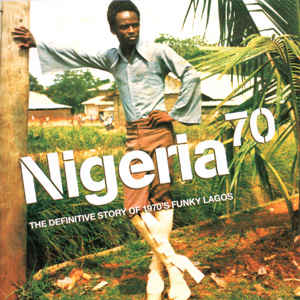

In [156]:
from IPython.display import display, Image
display(Image(filename='nigerianfunk.jpeg'))

### Introduction

People are needlessly suffering the consequences of their own poor taste in music. Wasting their lives listening to other things when they could be living life to the full with Nigerian 70s Funk and Soul as the soundtrack. 

### Our dream 
was to improve world happiness levels by asking for the favourite song of a user and then either <br/>
a) if their choice is in our top 25 approved Nigerian funk classics, outputting a congratulatory message and recommend another song from that playlist <br/>
b) if their choice is not in the list, ouputting a recommmended song from another 70s disco and funk playlist on spotify that has some similar attributes to the song they chose.


### Our reality

1. Got both playlist's ids and audio features through Spotify
2. Clustered them 
3. Added song names to DataFrame
4. Did not have time for making the recommendation function to work
5. Got a new team member to cheer for us

### Our learnings
1. Should have listened to Nigerian funk while working
2. Ask for help earlier, keep asking
3. Practice writing functions

### Spotify API

In [5]:
# import necessary spotipy tools
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import pandas as pd

#connecct to api
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="c775f2fba4064b8d89a723f0eb3c4015",
                                                          client_secret="0a1f7dca5ce74bed98f584a787308024"))

In [ ]:
client_id = str(getpass.getpass('client_id?'))
client_secret = str(getpass.getpass('client_secret?'))

## Playlists into DataFrames and Clustering

We will get the audio features of two playlists:

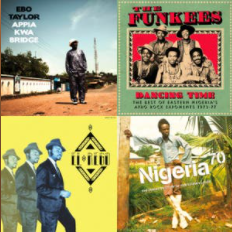

In [149]:
display(Image(filename='seventies.png'))

**70s Nigerian funk and soul (named seventiesfunk, 25 songs)**

Playlist link:
https://open.spotify.com/playlist/5Hnm8iYvXNUEUDXm5cmLBV?si=6b6766865232490a

From that this is the ID: 5Hnm8iYvXNUEUDXm5cmLBV

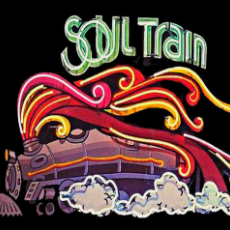

In [150]:
display(Image(filename='soultrain.png'))

**Soul Train 70s Disco and Funk (named soultrain, 875 songs)**

Playlist link:
https://open.spotify.com/playlist/77VyThCnZyVXifJqBRWrYm
    
From that this is the ID: 77VyThCnZyVXifJqBRWrYm

### Quering the first playlist's audio features

In [116]:
# get playlist
playlist = sp.user_playlist_tracks("Drew Thomson", "5Hnm8iYvXNUEUDXm5cmLBV")

In [113]:
# test length
len(playlist['items'])

25

In [112]:
# looping through and getting track ids
seventiesfunk = []
for item in playlist['items']:
    seventiesfunk.append(item['track']['id'])

In [118]:
# track ids of playlist
seventiesfunk

['05tplGwKpP4IBsxl9YVmqT',
 '5IxcHoFKH6BUbyxNloo7wA',
 '4APa6zmDf879PH0pEpCbut',
 '4QU8y1okxp6BCfsr4jkoTT',
 '0kvBXRTNvyLRNO3yGh3Gpo',
 '25MqHSPDiiXWlKa6iQKCpV',
 '1uJWClfwqs6kpvzPPvLu4n',
 '6yM82PxMywRHehdoQgQT8p',
 '3OtnM8u83bnl00TYwF3sWC',
 '5AarKoTInrX0cN9CsRRFWA',
 '5mpjIvDq4cgQFyZviKwSRP',
 '3tGxWRKRtJ7PbZKodKeX38',
 '4PCW6nxrT9qxet5scL7T1L',
 '4qjPqmHjPr17SxXD4yTGUR',
 '7lXMbCKIASfEK0OMOUPaz3',
 '6RbzqgaaGoKPGXVhD54N5N',
 '5gw1ST3f229kOxYSs2In15',
 '72gReM7OIHX7IbHjmg5bY1',
 '49l7ls7T8hWDFxLo6u9Cxj',
 '4G0kl0gSf1kLcTmpRj1EAN',
 '1w95kCIRyAeHcoCRGOH5ma',
 '2cdWCJGTqyVCaURgMD29rM',
 '43ile6cBzr9uaC4bJf6J3N',
 '3DzeFKf8A5Fvt4m848Mnae',
 '4KQ5vTPl7hTu2fyVcO95XS']

In [30]:
# these are the audio features for all songs in the playlist
sp.audio_features(tracks=seventiesfunk)

[{'danceability': 0.628,
  'energy': 0.542,
  'key': 1,
  'loudness': -11.973,
  'mode': 0,
  'speechiness': 0.32,
  'acousticness': 0.553,
  'instrumentalness': 2.58e-05,
  'liveness': 0.372,
  'valence': 0.824,
  'tempo': 107.389,
  'type': 'audio_features',
  'id': '05tplGwKpP4IBsxl9YVmqT',
  'uri': 'spotify:track:05tplGwKpP4IBsxl9YVmqT',
  'track_href': 'https://api.spotify.com/v1/tracks/05tplGwKpP4IBsxl9YVmqT',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/05tplGwKpP4IBsxl9YVmqT',
  'duration_ms': 256301,
  'time_signature': 4},
 {'danceability': 0.601,
  'energy': 0.711,
  'key': 0,
  'loudness': -10.698,
  'mode': 1,
  'speechiness': 0.106,
  'acousticness': 0.136,
  'instrumentalness': 0.00187,
  'liveness': 0.249,
  'valence': 0.929,
  'tempo': 119.385,
  'type': 'audio_features',
  'id': '5IxcHoFKH6BUbyxNloo7wA',
  'uri': 'spotify:track:5IxcHoFKH6BUbyxNloo7wA',
  'track_href': 'https://api.spotify.com/v1/tracks/5IxcHoFKH6BUbyxNloo7wA',
  'analysis_url': 'https:

In [119]:
# turning list into df
seventiesfunk = pd.DataFrame(sp.audio_features(tracks=seventiesfunk))

In [121]:
# checking it's shape
seventiesfunk.shape

(25, 18)

In [122]:
# checking df head
seventiesfunk.head(120)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.628,0.542,1,-11.973,0,0.3200,0.5530,0.000026,0.3720,0.824,107.389,audio_features,05tplGwKpP4IBsxl9YVmqT,spotify:track:05tplGwKpP4IBsxl9YVmqT,https://api.spotify.com/v1/tracks/05tplGwKpP4I...,https://api.spotify.com/v1/audio-analysis/05tp...,256301,4
1,0.601,0.711,0,-10.698,1,0.1060,0.1360,0.001870,0.2490,0.929,119.385,audio_features,5IxcHoFKH6BUbyxNloo7wA,spotify:track:5IxcHoFKH6BUbyxNloo7wA,https://api.spotify.com/v1/tracks/5IxcHoFKH6BU...,https://api.spotify.com/v1/audio-analysis/5Ixc...,292680,4
2,0.725,0.655,1,-6.712,1,0.0409,0.7150,0.136000,0.2830,0.740,108.411,audio_features,4APa6zmDf879PH0pEpCbut,spotify:track:4APa6zmDf879PH0pEpCbut,https://api.spotify.com/v1/tracks/4APa6zmDf879...,https://api.spotify.com/v1/audio-analysis/4APa...,204213,4
3,0.680,0.748,1,-7.937,1,0.0584,0.4490,0.129000,0.0705,0.968,108.428,audio_features,4QU8y1okxp6BCfsr4jkoTT,spotify:track:4QU8y1okxp6BCfsr4jkoTT,https://api.spotify.com/v1/tracks/4QU8y1okxp6B...,https://api.spotify.com/v1/audio-analysis/4QU8...,498973,4
4,0.703,0.699,5,-7.111,0,0.0633,0.7430,0.046900,0.0986,0.910,108.687,audio_features,0kvBXRTNvyLRNO3yGh3Gpo,spotify:track:0kvBXRTNvyLRNO3yGh3Gpo,https://api.spotify.com/v1/tracks/0kvBXRTNvyLR...,https://api.spotify.com/v1/audio-analysis/0kvB...,330707,4
5,0.727,0.732,1,-9.252,1,0.0574,0.6950,0.180000,0.1040,0.856,116.093,audio_features,25MqHSPDiiXWlKa6iQKCpV,spotify:track:25MqHSPDiiXWlKa6iQKCpV,https://api.spotify.com/v1/tracks/25MqHSPDiiXW...,https://api.spotify.com/v1/audio-analysis/25Mq...,180294,4
6,0.670,0.877,9,-5.907,1,0.0583,0.6050,0.015900,0.1190,0.734,118.973,audio_features,1uJWClfwqs6kpvzPPvLu4n,spotify:track:1uJWClfwqs6kpvzPPvLu4n,https://api.spotify.com/v1/tracks/1uJWClfwqs6k...,https://api.spotify.com/v1/audio-analysis/1uJW...,307107,4
7,0.718,0.626,10,-9.049,0,0.0604,0.1470,0.002070,0.0994,0.662,107.288,audio_features,6yM82PxMywRHehdoQgQT8p,spotify:track:6yM82PxMywRHehdoQgQT8p,https://api.spotify.com/v1/tracks/6yM82PxMywRH...,https://api.spotify.com/v1/audio-analysis/6yM8...,203040,4
8,0.804,0.795,10,-6.645,0,0.0913,0.1180,0.738000,0.0593,0.858,98.905,audio_features,3OtnM8u83bnl00TYwF3sWC,spotify:track:3OtnM8u83bnl00TYwF3sWC,https://api.spotify.com/v1/tracks/3OtnM8u83bnl...,https://api.spotify.com/v1/audio-analysis/3Otn...,473400,4
9,0.751,0.859,5,-6.791,0,0.0446,0.7130,0.265000,0.3040,0.656,123.945,audio_features,5AarKoTInrX0cN9CsRRFWA,spotify:track:5AarKoTInrX0cN9CsRRFWA,https://api.spotify.com/v1/tracks/5AarKoTInrX0...,https://api.spotify.com/v1/audio-analysis/5Aar...,463702,4


### Dropping columns, preparing for scaling

In [135]:
seventiesfunk = seventiesfunk.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'],  axis=1)

In [136]:
X_sf = seventiesfunk

### Applying StandardScaler

In [137]:
from sklearn.preprocessing import StandardScaler
X_prep_sf = StandardScaler().fit_transform(X_sf)

X_prep_sf_df = pd.DataFrame(X_prep_sf, columns = seventiesfunk.columns)


### Preparing the clusters

In [138]:
from sklearn.cluster import KMeans

kmeans_sf = KMeans(n_clusters=8, random_state=1234)

kmeans_sf.fit(X_prep_sf_df)

kmeans_sf.cluster_centers_

array([[-0.41469456,  0.11043345,  1.53183788, -0.27616101, -0.88640526,
        -0.52707234, -0.74387921,  0.25410258, -0.61670935, -2.10967081,
        -0.6485443 , -0.4599714 ,  0.20412415],
       [-0.36023309, -0.14940135, -0.59322927, -0.10503329,  1.12815215,
        -0.52981849,  0.04882579, -0.28107271,  0.06260317,  0.17328268,
         0.15545496, -0.65068075,  0.20412415],
       [ 0.21372143,  0.22921508, -0.14265112, -0.13406016, -0.59861134,
         0.12151805,  0.35313855, -0.27894998,  0.05745027,  0.52145978,
         0.31208123,  0.66206074,  0.20412415],
       [-0.83463842, -0.47218205, -0.79455142,  0.18652946,  1.12815215,
         1.11593873,  0.91449076, -0.58711031,  1.19899771, -0.22448641,
         3.29814688, -0.22255864, -4.89897949],
       [ 1.29132737,  0.9111638 ,  0.95024056,  1.34394299, -0.88640526,
         0.07333953, -0.61248209,  2.83878262,  0.60896462,  0.53850702,
        -0.8108502 ,  0.9180708 ,  0.20412415],
       [ 2.7243858 , -2.843632

In [139]:
# total inertia of all the centroids
kmeans_sf.inertia_

116.99424728589669

In [140]:
clusters_sf = kmeans_sf.predict(X_prep_sf)
clusters_sf

array([7, 1, 1, 2, 2, 1, 1, 0, 4, 2, 2, 3, 0, 2, 1, 4, 1, 1, 2, 0, 5, 6,
       6, 2, 1], dtype=int32)

In [41]:
pd.Series(clusters_sf).value_counts().sort_index()


0    3
1    8
2    7
3    1
4    2
5    1
6    2
7    1
dtype: int64

In [141]:
kmeans_sf.cluster_centers_

array([[-0.41469456,  0.11043345,  1.53183788, -0.27616101, -0.88640526,
        -0.52707234, -0.74387921,  0.25410258, -0.61670935, -2.10967081,
        -0.6485443 , -0.4599714 ,  0.20412415],
       [-0.36023309, -0.14940135, -0.59322927, -0.10503329,  1.12815215,
        -0.52981849,  0.04882579, -0.28107271,  0.06260317,  0.17328268,
         0.15545496, -0.65068075,  0.20412415],
       [ 0.21372143,  0.22921508, -0.14265112, -0.13406016, -0.59861134,
         0.12151805,  0.35313855, -0.27894998,  0.05745027,  0.52145978,
         0.31208123,  0.66206074,  0.20412415],
       [-0.83463842, -0.47218205, -0.79455142,  0.18652946,  1.12815215,
         1.11593873,  0.91449076, -0.58711031,  1.19899771, -0.22448641,
         3.29814688, -0.22255864, -4.89897949],
       [ 1.29132737,  0.9111638 ,  0.95024056,  1.34394299, -0.88640526,
         0.07333953, -0.61248209,  2.83878262,  0.60896462,  0.53850702,
        -0.8108502 ,  0.9180708 ,  0.20412415],
       [ 2.7243858 , -2.843632

In [43]:
X_sf_df = pd.DataFrame(X_sf)
X_sf_df['cluster'] = clusters_sf
X_sf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.628,0.542,1,-11.973,0,0.3200,0.553,0.000026,0.3720,0.824,107.389,256301,4,7
1,0.601,0.711,0,-10.698,1,0.1060,0.136,0.001870,0.2490,0.929,119.385,292680,4,1
2,0.725,0.655,1,-6.712,1,0.0409,0.715,0.136000,0.2830,0.740,108.411,204213,4,1
3,0.680,0.748,1,-7.937,1,0.0584,0.449,0.129000,0.0705,0.968,108.428,498973,4,2
4,0.703,0.699,5,-7.111,0,0.0633,0.743,0.046900,0.0986,0.910,108.687,330707,4,2


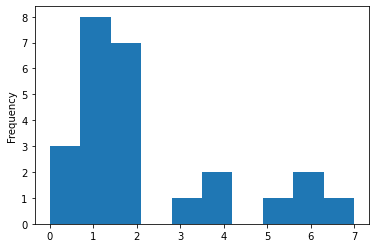

In [124]:
X_sf_df['cluster'].plot(kind='hist');

## Quering the second playlist's audio features

In [125]:
# getting playlist
playlist = sp.user_playlist_tracks("djlarras", "77VyThCnZyVXifJqBRWrYm")

### Function to get all 850 songs instead of 100

In [171]:
#set variables
playlist_id = "77VyThCnZyVXifJqBRWrYm"
#1- define function
def get_playlist_tracks(playlist_id):
    results= sp.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
#2- call function on playlist
full_track_ids= get_playlist_tracks(playlist_id)

In [60]:
soultrain = get_playlist_tracks(playlist_id)

In [126]:
# get track ids
soultrain_1 = []
for item in soultrain:
    soultrain_1.append(item['track']['id'])

In [127]:
#check length
len(soultrain_1)

875

In [65]:
# these are the audio features for all songs in the playlist
sp.audio_features(tracks=soultrain_1[:50])

[{'danceability': 0.754,
  'energy': 0.673,
  'key': 7,
  'loudness': -10.211,
  'mode': 0,
  'speechiness': 0.0299,
  'acousticness': 0.127,
  'instrumentalness': 0.000681,
  'liveness': 0.129,
  'valence': 0.967,
  'tempo': 112.669,
  'type': 'audio_features',
  'id': '2wNKo4dQkKV06ebyb34Ffb',
  'uri': 'spotify:track:2wNKo4dQkKV06ebyb34Ffb',
  'track_href': 'https://api.spotify.com/v1/tracks/2wNKo4dQkKV06ebyb34Ffb',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2wNKo4dQkKV06ebyb34Ffb',
  'duration_ms': 260693,
  'time_signature': 4},
 {'danceability': 0.869,
  'energy': 0.648,
  'key': 11,
  'loudness': -8.698,
  'mode': 0,
  'speechiness': 0.0633,
  'acousticness': 0.121,
  'instrumentalness': 2.17e-05,
  'liveness': 0.126,
  'valence': 0.9,
  'tempo': 125.035,
  'type': 'audio_features',
  'id': '3koCCeSaVUyrRo3N2gHrd8',
  'uri': 'spotify:track:3koCCeSaVUyrRo3N2gHrd8',
  'track_href': 'https://api.spotify.com/v1/tracks/3koCCeSaVUyrRo3N2gHrd8',
  'analysis_url': 'http

### Getting them in chunks of 50  and assigning into a DataFrame 

In [93]:
# songs: a list of song ids

def chunks(lst, n):
    #"""Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

        
audio_feats = []
for chunk in list(chunks(soultrain_1, 50)):
        audio_feats.append(sp.audio_features(chunk))
        
audio_feats_new = [feats for subfeats in audio_feats for feats in subfeats]

In [94]:
len(audio_feats_new)

875

In [128]:
# creating df
soultrain_df = pd.DataFrame(audio_feats_new)

In [130]:
# checking it's shape 
soultrain_df.shape

(875, 18)

In [132]:
# checking df
soultrain_df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.754,0.673,7,-10.211,0,0.0299,0.12700,0.000681,0.1290,0.967,112.669,audio_features,2wNKo4dQkKV06ebyb34Ffb,spotify:track:2wNKo4dQkKV06ebyb34Ffb,https://api.spotify.com/v1/tracks/2wNKo4dQkKV0...,https://api.spotify.com/v1/audio-analysis/2wNK...,260693,4
1,0.869,0.648,11,-8.698,0,0.0633,0.12100,0.000022,0.1260,0.900,125.035,audio_features,3koCCeSaVUyrRo3N2gHrd8,spotify:track:3koCCeSaVUyrRo3N2gHrd8,https://api.spotify.com/v1/tracks/3koCCeSaVUyr...,https://api.spotify.com/v1/audio-analysis/3koC...,339320,4
2,0.802,0.756,2,-10.791,0,0.0349,0.08430,0.007650,0.0521,0.963,131.715,audio_features,6ztstiyZL6FXzh4aG46ZPD,spotify:track:6ztstiyZL6FXzh4aG46ZPD,https://api.spotify.com/v1/tracks/6ztstiyZL6FX...,https://api.spotify.com/v1/audio-analysis/6zts...,288293,4
3,0.611,0.899,2,-10.897,1,0.0320,0.01410,0.096600,0.0786,0.847,100.868,audio_features,60z6SdowBWlN6n8U0O2NP8,spotify:track:60z6SdowBWlN6n8U0O2NP8,https://api.spotify.com/v1/tracks/60z6SdowBWlN...,https://api.spotify.com/v1/audio-analysis/60z6...,549000,4
4,0.817,0.754,11,-8.347,1,0.0467,0.17400,0.013800,0.0597,0.924,98.182,audio_features,2rZFZPfEf54mWk2qGkR2SV,spotify:track:2rZFZPfEf54mWk2qGkR2SV,https://api.spotify.com/v1/tracks/2rZFZPfEf54m...,https://api.spotify.com/v1/audio-analysis/2rZF...,244440,4
5,0.718,0.676,11,-11.633,0,0.0318,0.15300,0.030600,0.0706,0.944,112.711,audio_features,1uGFGhxJ9ISGcy7iDffP7V,spotify:track:1uGFGhxJ9ISGcy7iDffP7V,https://api.spotify.com/v1/tracks/1uGFGhxJ9ISG...,https://api.spotify.com/v1/audio-analysis/1uGF...,316267,4
6,0.667,0.577,11,-12.729,1,0.1630,0.22800,0.000039,0.0566,0.923,111.802,audio_features,5F8CrWvnESlOBmFkyxFJqt,spotify:track:5F8CrWvnESlOBmFkyxFJqt,https://api.spotify.com/v1/tracks/5F8CrWvnESlO...,https://api.spotify.com/v1/audio-analysis/5F8C...,209800,4
7,0.673,0.752,9,-7.978,0,0.0491,0.00309,0.000000,0.1120,0.576,120.041,audio_features,2a1MrtxYybqFV1Ow8VJ1dW,spotify:track:2a1MrtxYybqFV1Ow8VJ1dW,https://api.spotify.com/v1/tracks/2a1MrtxYybqF...,https://api.spotify.com/v1/audio-analysis/2a1M...,265027,4
8,0.774,0.641,1,-10.193,1,0.0799,0.07650,0.000000,0.0867,0.875,113.256,audio_features,3qI94hINNNeb4S7xQi18lS,spotify:track:3qI94hINNNeb4S7xQi18lS,https://api.spotify.com/v1/tracks/3qI94hINNNeb...,https://api.spotify.com/v1/audio-analysis/3qI9...,214200,4
9,0.879,0.626,7,-6.344,1,0.0604,0.20500,0.000061,0.0560,0.968,110.864,audio_features,1OsCKwNZxph96EkNusILRy,spotify:track:1OsCKwNZxph96EkNusILRy,https://api.spotify.com/v1/tracks/1OsCKwNZxph9...,https://api.spotify.com/v1/audio-analysis/1OsC...,212907,4


### Dropping columns, preparing to cluster

In [99]:
soultrain_df = soultrain_df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'],  axis=1)

In [100]:
X = soultrain_df

### Applying StandardScaler

In [102]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

X_prep_df = pd.DataFrame(X_prep, columns = soultrain_df.columns)


### Creating clusters

In [103]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)

kmeans.fit(X_prep_df)

kmeans.cluster_centers_

array([[ 6.40225260e-01, -1.19273880e+00, -7.12520431e-02,
        -1.09286131e+00, -6.23498213e-02, -9.25645957e-02,
        -3.29743569e-01, -2.07643965e-01, -3.77953057e-01,
         2.95787844e-01,  2.28327453e-02,  7.29099957e-02,
         0.00000000e+00],
       [-2.07170721e-01,  4.88660586e-01, -3.93001333e-01,
         3.85467506e-01,  9.92031746e-01, -1.72440850e-01,
        -3.10435369e-01, -2.73722072e-01, -8.04346923e-02,
        -1.16348340e-01, -4.41311557e-02, -8.45707703e-02,
         0.00000000e+00],
       [ 3.82249540e-01, -2.20387520e-01,  2.09480483e-01,
        -3.46747875e-01,  6.17019745e-01,  3.64789892e+00,
         1.81342960e-01, -3.79498056e-01, -6.59880086e-02,
        -1.02665074e+00, -3.52869822e-02, -1.44047054e-01,
         0.00000000e+00],
       [-6.51441013e-01,  4.40430780e-01,  2.53404620e-01,
         2.67639568e-01, -2.02450923e-01,  9.30728853e-02,
         2.27640559e-01, -2.64557021e-01,  2.28776726e+00,
        -5.92813599e-01,  6.93417998e

In [142]:
# total inertia of all the centroids
kmeans.inertia_

7393.9628737600615

In [105]:
clusters = kmeans.predict(X_prep)
clusters

array([4, 4, 4, 1, 7, 4, 2, 4, 1, 7, 0, 4, 0, 0, 7, 7, 4, 4, 4, 4, 4, 1,
       0, 5, 0, 0, 0, 0, 4, 0, 4, 4, 0, 5, 1, 1, 4, 4, 7, 1, 4, 7, 1, 0,
       4, 0, 4, 0, 4, 7, 4, 0, 1, 1, 1, 7, 4, 3, 0, 1, 1, 3, 4, 0, 3, 1,
       4, 1, 4, 4, 0, 7, 4, 1, 7, 1, 1, 1, 7, 5, 3, 0, 4, 4, 0, 0, 1, 7,
       5, 1, 1, 4, 1, 3, 4, 2, 1, 7, 0, 7, 2, 4, 4, 1, 1, 4, 0, 4, 1, 4,
       5, 1, 4, 5, 4, 5, 0, 0, 0, 0, 4, 7, 5, 4, 0, 0, 1, 1, 7, 1, 3, 3,
       1, 0, 4, 5, 4, 1, 4, 1, 1, 0, 1, 4, 0, 1, 0, 0, 5, 0, 4, 0, 0, 3,
       4, 4, 7, 1, 0, 0, 1, 4, 4, 2, 1, 3, 3, 2, 4, 4, 0, 1, 4, 2, 1, 1,
       2, 3, 5, 0, 0, 4, 4, 1, 1, 4, 5, 1, 3, 7, 7, 0, 7, 5, 4, 1, 0, 4,
       7, 5, 4, 1, 4, 4, 7, 0, 2, 4, 4, 4, 1, 4, 0, 2, 4, 7, 7, 4, 1, 1,
       3, 1, 4, 1, 4, 1, 7, 1, 3, 4, 4, 1, 4, 0, 0, 1, 4, 1, 4, 7, 2, 4,
       1, 4, 0, 3, 1, 4, 1, 1, 1, 0, 7, 5, 1, 1, 0, 6, 7, 7, 7, 3, 4, 5,
       4, 7, 0, 3, 1, 3, 2, 4, 4, 4, 0, 1, 4, 1, 1, 0, 0, 1, 0, 5, 0, 0,
       0, 4, 1, 0, 4, 1, 7, 1, 4, 2, 4, 4, 7, 5, 0,

In [106]:
pd.Series(clusters).value_counts().sort_index()

0    184
1    201
2     32
3     72
4    222
5     82
6      1
7     81
dtype: int64

In [133]:
kmeans.cluster_centers_

array([[ 6.40225260e-01, -1.19273880e+00, -7.12520431e-02,
        -1.09286131e+00, -6.23498213e-02, -9.25645957e-02,
        -3.29743569e-01, -2.07643965e-01, -3.77953057e-01,
         2.95787844e-01,  2.28327453e-02,  7.29099957e-02,
         0.00000000e+00],
       [-2.07170721e-01,  4.88660586e-01, -3.93001333e-01,
         3.85467506e-01,  9.92031746e-01, -1.72440850e-01,
        -3.10435369e-01, -2.73722072e-01, -8.04346923e-02,
        -1.16348340e-01, -4.41311557e-02, -8.45707703e-02,
         0.00000000e+00],
       [ 3.82249540e-01, -2.20387520e-01,  2.09480483e-01,
        -3.46747875e-01,  6.17019745e-01,  3.64789892e+00,
         1.81342960e-01, -3.79498056e-01, -6.59880086e-02,
        -1.02665074e+00, -3.52869822e-02, -1.44047054e-01,
         0.00000000e+00],
       [-6.51441013e-01,  4.40430780e-01,  2.53404620e-01,
         2.67639568e-01, -2.02450923e-01,  9.30728853e-02,
         2.27640559e-01, -2.64557021e-01,  2.28776726e+00,
        -5.92813599e-01,  6.93417998e

In [108]:
X_df = pd.DataFrame(X)
X_df['cluster'] = clusters
X_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.754,0.673,7,-10.211,0,0.0299,0.1270,0.000681,0.1290,0.967,112.669,260693,4,4
1,0.869,0.648,11,-8.698,0,0.0633,0.1210,0.000022,0.1260,0.900,125.035,339320,4,4
2,0.802,0.756,2,-10.791,0,0.0349,0.0843,0.007650,0.0521,0.963,131.715,288293,4,4
3,0.611,0.899,2,-10.897,1,0.0320,0.0141,0.096600,0.0786,0.847,100.868,549000,4,1
4,0.817,0.754,11,-8.347,1,0.0467,0.1740,0.013800,0.0597,0.924,98.182,244440,4,7


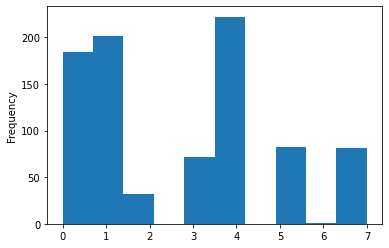

In [134]:
X_df['cluster'].plot(kind='hist');

### Adding song names to the DataFrame

In [169]:
# Function to look up the name and id of each song and create a new dictionary 
# with these two iteams as key and vlaue. 

soultrain_1 = {}
length_of_playlist_items = len(soultrain)
for i in range(length_of_playlist_items):
    a = soultrain[i]['track']['id']
    b = soultrain[i]['track']['name']
    soultrain_1[a] = b

In [162]:
X_df['id'] = soultrain_df['id']

In [165]:
X_df["name"] = ""

In [166]:
X_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster,id,name
0,0.754,0.673,7,-10.211,0,0.0299,0.1270,0.000681,0.1290,0.967,112.669,260693,4,4,2wNKo4dQkKV06ebyb34Ffb,
1,0.869,0.648,11,-8.698,0,0.0633,0.1210,0.000022,0.1260,0.900,125.035,339320,4,4,3koCCeSaVUyrRo3N2gHrd8,
2,0.802,0.756,2,-10.791,0,0.0349,0.0843,0.007650,0.0521,0.963,131.715,288293,4,4,6ztstiyZL6FXzh4aG46ZPD,
3,0.611,0.899,2,-10.897,1,0.0320,0.0141,0.096600,0.0786,0.847,100.868,549000,4,1,60z6SdowBWlN6n8U0O2NP8,
4,0.817,0.754,11,-8.347,1,0.0467,0.1740,0.013800,0.0597,0.924,98.182,244440,4,7,2rZFZPfEf54mWk2qGkR2SV,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0.706,0.699,9,-12.629,1,0.1720,0.6080,0.000000,0.0762,0.700,97.993,201747,4,7,2xHP35CnfAfAyxZLKQZ1XC,
871,0.678,0.850,11,-7.849,0,0.0855,0.1300,0.013100,0.0738,0.426,119.835,226547,4,4,2wsVvmGSp46TlbTeGt7EGo,
872,0.720,0.757,0,-10.723,1,0.0627,0.0502,0.002560,0.0666,0.484,118.270,491000,4,1,2j8m9sboX9FFadbKctTXq1,
873,0.759,0.790,8,-9.005,0,0.1240,0.1000,0.291000,0.0306,0.739,118.583,280000,4,4,51Hi86XvW7X8MoCyhTITtM,


In [170]:
# create a column in the dataframe with the song name
for i in range(850):
    X_df['name'][i] = soultrain_1[X_df['id'][i]]

<ipython-input-170-caab64071e8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['name'][i] = soultrain_1[X_df['id'][i]]


In [168]:
X_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster,id,name
0,0.754,0.673,7,-10.211,0,0.0299,0.1270,0.000681,0.1290,0.967,112.669,260693,4,4,2wNKo4dQkKV06ebyb34Ffb,I Can Make You Feel Good
1,0.869,0.648,11,-8.698,0,0.0633,0.1210,0.000022,0.1260,0.900,125.035,339320,4,4,3koCCeSaVUyrRo3N2gHrd8,Let's Groove
2,0.802,0.756,2,-10.791,0,0.0349,0.0843,0.007650,0.0521,0.963,131.715,288293,4,4,6ztstiyZL6FXzh4aG46ZPD,Boogie Wonderland
3,0.611,0.899,2,-10.897,1,0.0320,0.0141,0.096600,0.0786,0.847,100.868,549000,4,1,60z6SdowBWlN6n8U0O2NP8,Just Be Good to Me
4,0.817,0.754,11,-8.347,1,0.0467,0.1740,0.013800,0.0597,0.924,98.182,244440,4,7,2rZFZPfEf54mWk2qGkR2SV,Don't Stop The Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0.706,0.699,9,-12.629,1,0.1720,0.6080,0.000000,0.0762,0.700,97.993,201747,4,7,2xHP35CnfAfAyxZLKQZ1XC,
871,0.678,0.850,11,-7.849,0,0.0855,0.1300,0.013100,0.0738,0.426,119.835,226547,4,4,2wsVvmGSp46TlbTeGt7EGo,
872,0.720,0.757,0,-10.723,1,0.0627,0.0502,0.002560,0.0666,0.484,118.270,491000,4,1,2j8m9sboX9FFadbKctTXq1,
873,0.759,0.790,8,-9.005,0,0.1240,0.1000,0.291000,0.0306,0.739,118.583,280000,4,4,51Hi86XvW7X8MoCyhTITtM,


### Recommendation function

In [146]:
def recommender():
    from random import randint
    # input from user
    song_choice=input("What song do you like right now?")
    if len(song_choice)==0:
        print("it looks like you cant think of a song at the moment")
    else: 
        song_choice_l=song_choice.lower() #convert input to lowercase
        filter_song=seventiesfunk[(seventiesfunk["title"].str.lower()).str.contains(song_choice_l)]# convert target to lowercase
        # check if its in the list we have
        if len(filter_song) ==0:
            print("that song is not hot, sorry")

        else:
            # if song is in billboard hot 100, confirm it, recommend another random hot song
            print("That's a hot song.")
            random_song = randint(0, len(top_100)-1)
            print("You might also like " + top_100["title"][random_song] + " by " + top_100["performed_by"][random_song])
            